In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("src")
sys.path.append("modules")

from utils import nash_sutcliffe_efficiency

# 定义模型

In [2]:
from hydrological_model import hydrological_model

FUN_MOD = "GR4H"
hydro_model = hydrological_model(FUN_MOD)

In [3]:
# 读取所有支持模型
hydro_model._feat_models()
# 读取全局配置文件
hydro_model._read_global_conf()
# 读取流域数据
hydro_model._read_data()
# 检查模型及数据
hydro_model._check_model()
# 读取模型率定配置数据
hydro_model._read_calibration_conf()
hydro_model._read_params_bounds()

# 模型参数率定
hydro_model.calibrate()

# 生成模型输入数据
model_data = hydro_model.generate_inputs()
model_param = hydro_model.bestx
observations = hydro_model.generate_observations()

# 模型模拟
qsim = hydro_model.run_model(model_data, model_param)

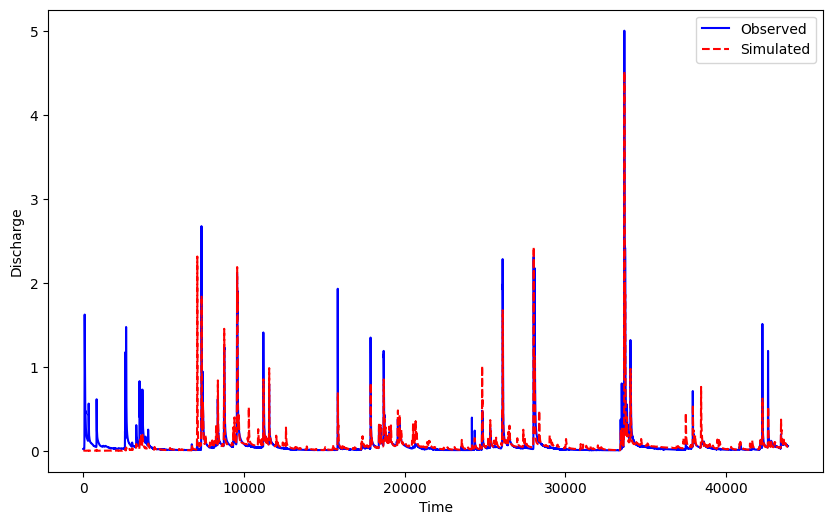

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(observations, label='Observed', color='blue')
ax.plot(qsim, label='Simulated', color='red', linestyle='--')
ax.set_xlabel('Time')
ax.set_ylabel('Discharge')
ax.legend()
plt.show()

In [5]:
print(f"nash_sutcliffe_efficiency: {nash_sutcliffe_efficiency(observations, qsim)}")

nash_sutcliffe_efficiency: 0.7014154820081391
